In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Chargement des données
url = "nlp_1.csv"
data = pd.read_csv(url, delimiter=';')


In [4]:
data.head()

,labels,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Question 1: Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['labels'], test_size=0.2, random_state=42)

nb_model = make_pipeline(CountVectorizer(), MultinomialNB())
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')

print("Naive Bayes - Accuracy:", nb_accuracy)
print("Naive Bayes - Recall:", nb_recall)
print("Naive Bayes - F1 Score:", nb_f1)

# Question 2: Perceptron
perceptron_model = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), Perceptron())
perceptron_model.fit(X_train, y_train)

perceptron_predictions = perceptron_model.predict(X_test)
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
perceptron_recall = recall_score(y_test, perceptron_predictions, average='weighted')
perceptron_f1 = f1_score(y_test, perceptron_predictions, average='weighted')

print("\nPerceptron - Accuracy:", perceptron_accuracy)
print("Perceptron - Recall:", perceptron_recall)
print("Perceptron - F1 Score:", perceptron_f1)

Naive Bayes - Accuracy: 0.9811151079136691
Naive Bayes - Recall: 0.9811151079136691
Naive Bayes - F1 Score: 0.9807792982020312

Perceptron - Accuracy: 0.9622302158273381
Perceptron - Recall: 0.9622302158273381
Perceptron - F1 Score: 0.9628819100408297


In [10]:
# Question 3: Techniques d'amélioration
# - Utiliser des techniques de prétraitement telles que la suppression de stop words, la lemmatisation, etc.
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download stopwords and WordNet resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply preprocessing to your text data
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kali/nltk_data...


In [11]:
# Question 4: 
# Training the Perceptron model on preprocessed data
perceptron_model.fit(X_train_preprocessed, y_train)

# Making predictions on the test set
perceptron_predictions_cleaned = perceptron_model.predict(X_test_preprocessed)

# Evaluating the model after data cleaning
perceptron_accuracy_cleaned = accuracy_score(y_test, perceptron_predictions_cleaned)
perceptron_recall_cleaned = recall_score(y_test, perceptron_predictions_cleaned, average='weighted')
perceptron_f1_cleaned = f1_score(y_test, perceptron_predictions_cleaned, average='weighted')

print("\nPerceptron (after data cleaning) - Accuracy:", perceptron_accuracy_cleaned)
print("Perceptron (after data cleaning) - Recall:", perceptron_recall_cleaned)
print("Perceptron (after data cleaning) - F1 Score:", perceptron_f1_cleaned)


Perceptron (after data cleaning) - Accuracy: 0.9568345323741008
Perceptron (after data cleaning) - Recall: 0.9568345323741008
Perceptron (after data cleaning) - F1 Score: 0.9581575538106885


In [12]:
# Marche pas

In [16]:
# Exercice 2 
# Question 1
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Computer_security"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Trouver toutes les données (par exemple, dans des balises <p>)
data_list = [paragraph.text for paragraph in soup.find_all('p')]


In [20]:
# Question 2
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Télécharger les stopwords (une seule fois)
# nltk.download('stopwords')
nltk.download('punkt')

# Nettoyage des données
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    words = word_tokenize(text.lower())
    words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return words

cleaned_data = [clean_text(sentence) for sentence in data_list]

# Utilisation de Word2Vec
model = Word2Vec(sentences=cleaned_data, vector_size=100, window=5, min_count=1, workers=4)


[nltk_data] Downloading package punkt to /home/kali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Question 3 
similar_words_attack = model.wv.most_similar('attack', topn=5)
similar_words_protect = model.wv.most_similar('protect', topn=5)

print("Similar words for 'attack':", similar_words_attack)
print("Similar words for 'protect':", similar_words_protect)



Similar words for 'attack': [('secur', 0.4970308244228363), ('threat', 0.4760143756866455), ('use', 0.4677467942237854), ('comput', 0.44967424869537354), ('organ', 0.4433143734931946)]
Similar words for 'protect': [('devic', 0.4296593964099884), ('standard', 0.3980986773967743), ('attack', 0.3635062277317047), ('author', 0.35919976234436035), ('system', 0.3583561182022095)]


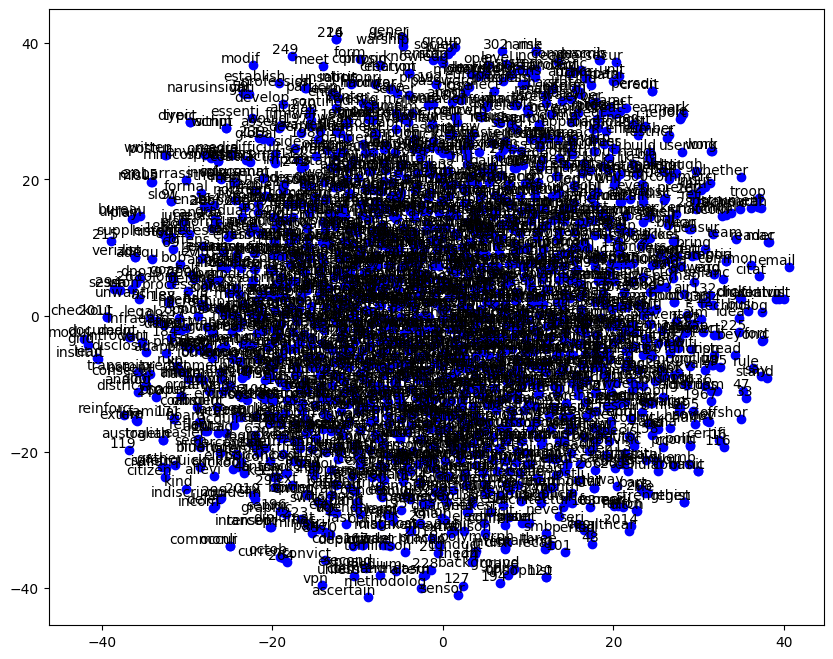

In [36]:
# Question 4 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convertir la liste de vecteurs en un tableau NumPy
vectors_array = np.array(vectors)

# Réduction de dimension avec t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
vectors_2d = tsne_model.fit_transform(vectors_array)

# Tracer les points
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue')

# Ajouter des annotations pour chaque point
for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right')

plt.show()


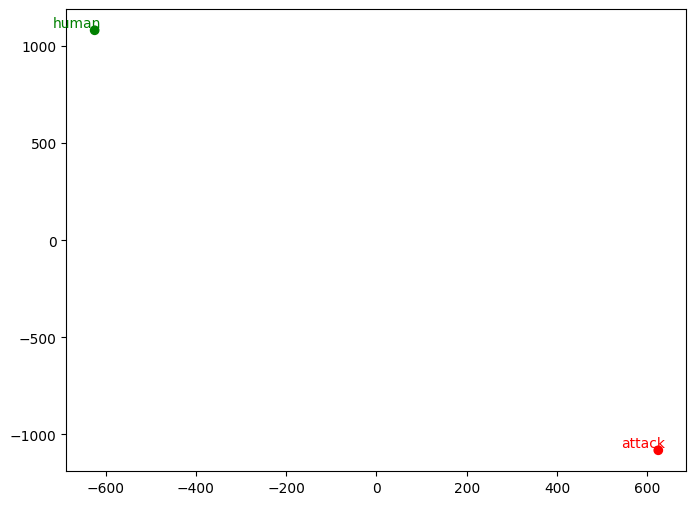

In [52]:
# Question 5 
# Obtenez les vecteurs pour les mots "attack" et "human"
vectors_attack = model.wv['attack'].reshape(1, -1)
vectors_human = model.wv['human'].reshape(1, -1)

# Concaténez les vecteurs
vectors_to_plot = np.concatenate([vectors_attack, vectors_human])

# Réduction de dimension avec t-SNE
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=1).fit_transform(vectors_to_plot)

# Tracer les points
plt.figure(figsize=(8, 6))
plt.scatter(tsne_model[:, 0], tsne_model[:, 1], c=['red', 'green'])

# Ajouter des annotations pour chaque point
plt.annotate('attack', xy=(tsne_model[0, 0], tsne_model[0, 1]), xytext=(5, 2), textcoords='offset points', ha='right', color='red')
plt.annotate('human', xy=(tsne_model[1, 0], tsne_model[1, 1]), xytext=(5, 2), textcoords='offset points', ha='right', color='green')

plt.show()


In [55]:
# Exercice 3 : 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Charger les données
data = pd.read_csv("emotion_classify_dataset.csv")

# Afficher les premières lignes du DataFrame pour vérifier les données
print(data.head())


                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [57]:

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data, train_labels, test_labels = train_test_split(data['Comment'], data['Emotion'], test_size=0.2, random_state=42)

# Créer un vecteur TF-IDF pour représenter les phrases
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Créer et entraîner un modèle de forêt aléatoire
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_vectors, train_labels)

# Prédire les émotions sur l'ensemble de test
predictions = classifier.predict(test_vectors)

# Évaluer les performances du modèle
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)



Accuracy: 0.946969696969697
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.94      0.94       392
        fear       0.97      0.93      0.95       416
         joy       0.94      0.97      0.95       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188

